# Описание проекта
Исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План исследования
Шаг 1. Откроем файл с данными и изучим общую информацию

Шаг 2. Подготовим данные

Шаг 3. Проведем исследовательский анализ данных
•	Посмотрим, сколько игр выпускалось в разные годы. Выясним, важны ли данные за все периоды?
•	Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и пострим распределение по годам.
•	Выясним, Какие платформы лидируют по продажам, растут или падают? 
•	Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
•	Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
•	Соотнесем выводы с продажами игр на других платформах.
•	Посмотрим на общее распределение игр по жанрам. 

Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишем различия в долях продаж.
•	Самые популярные жанры (топ-5). Поясним разницу.
•	узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверим гипотезы
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Общий вывод




In [2]:
import pandas as pd # импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
try:
    data_games= pd.read_csv(r"C:\Users\Пользователь\Documents\Data Analyst\СБОРНЫЙ 1\games.csv")
    
except:
    data_games = pd.read_csv("/datasets/games.csv")
data_games.info()
display(data_games.head(10))
print(data_games.columns)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


## Обзор данных. Предобработка.
Вывели на экран данные, увидели несоотвтетсвие типов данных и пропуски. Разберемся с этими проблемами и проверим на явные дубликаты,а также приведем названия столбцов к нижнему регистру.

In [4]:
data_games.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',\
                           'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',\
                           'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, inplace=True)
display(data_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data_games=data_games.drop_duplicates() #избавимся от дубликатов
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
# удалим пропуски. Поскольку в колонках year_of_release, name, genre их количество маленькое, то просто удалим строки целиком
print(data_games['year_of_release'].isna().sum())
data_games= data_games.dropna(subset=['name'])
data_games= data_games.dropna(subset=['year_of_release'])
data_games= data_games.dropna(subset=['genre'])

data_games.info()



269
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
# избавимся от пропусков в столбце 
display(data_games[data_games['user_score'] == 'tbd']) #аббревиатура скорее всего расшифровывается как to be done (предстоит выполнить)\
# то есть данных нет, равносильно Nan. Заменим аббревиатуру на Nan
data_games['user_score']= data_games['user_score'].replace('tbd', np.NaN)
data_games['user_score']= data_games['user_score'].astype('float64')
data_games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [8]:
# добавим в таблицу новый столбец с совокупными продажами по каждой игре
data_games['total_sales']= data_games[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)
display(data_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [9]:
# заменим пропуски в столбце rating на unknown
data_games['rating']=data_games['rating'].fillna('unknown')
data_games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Вывод по предобработке данных: Мы избавились от пропусков и дубликатов, поменяли тип данных в нескольких столбцах, привели в порядок названия столбцов. В столбцах 'critic_score', 'user_score', 'rating' 
    оставили пропуски Nan, так как их нечем заменить, нет сильной корреляции с другими данными. Добавили в таблицу столбец с совокупными продажами игр по всем регионам.
    

## Исследовательский анализ.
Посмотрим, сколько игр выпускалось в разные годы. Оценим важность данных за все периоды?

,total_sales
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


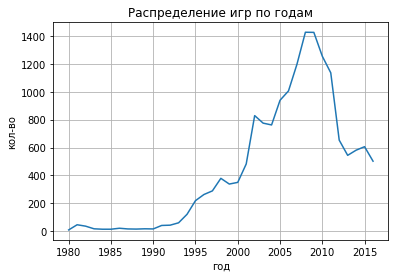

In [10]:
year_game=data_games.pivot_table(index='year_of_release', values= 'total_sales', aggfunc= 'count')
display(year_game.head(10))
plt.plot(year_game)
plt.title('Распределение игр по годам')
plt.xlabel('год')
plt.ylabel('кол-во')
plt.grid(True)

Мы видим рост продаж игр, начиная с 1992 года. До этого года пргодажи были несмущественны. Отсечем этот период как статистически незначимый.

In [11]:
data_good_years=data_games[data_games['year_of_release'] >= 1992]
data_good_years.info()
display(data_good_years.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16182 non-null  object 
 1   platform         16182 non-null  object 
 2   year_of_release  16182 non-null  float64
 3   genre            16182 non-null  object 
 4   na_sales         16182 non-null  float64
 5   eu_sales         16182 non-null  float64
 6   jp_sales         16182 non-null  float64
 7   other_sales      16182 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16182 non-null  object 
 11  total_sales      16182 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown,23.09


In [12]:
platform=data_good_years.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Количество продаж')

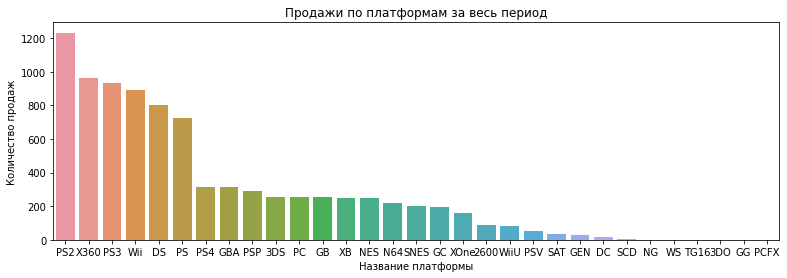

In [13]:
platform_sales = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.


In [14]:
platform_grouped = platform_sales.reset_index()

In [15]:
#Составим список всех платформ.
top_platforms = platform_grouped['platform'].unique()
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
       '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

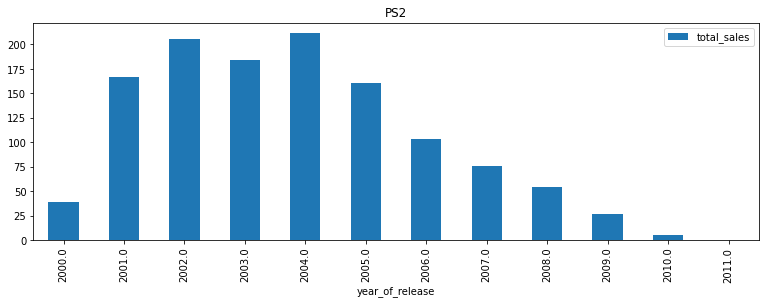

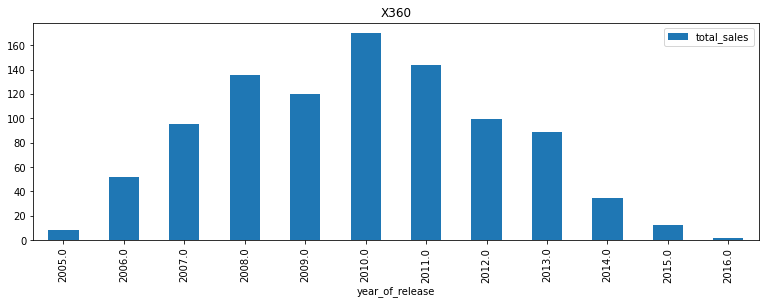

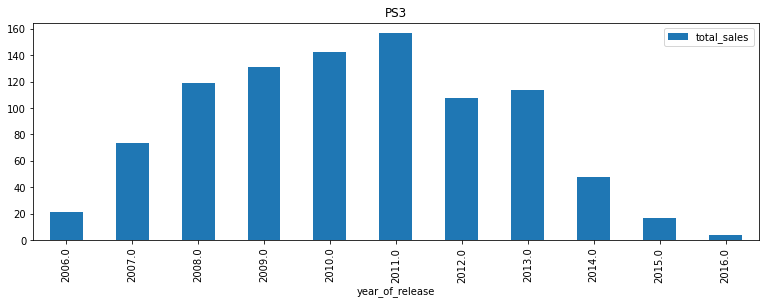

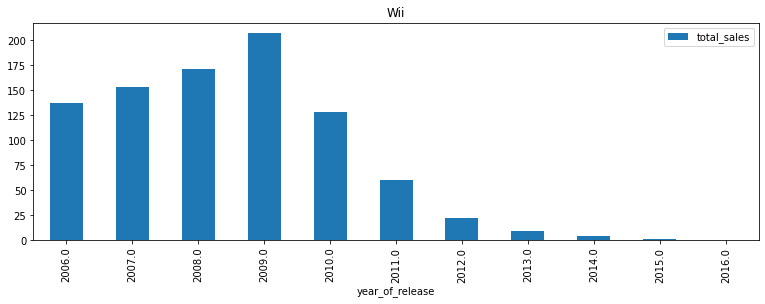

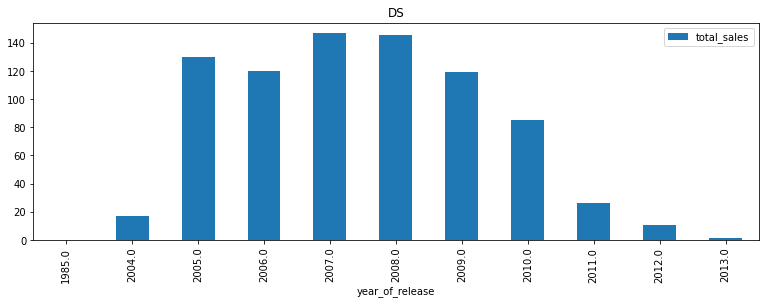

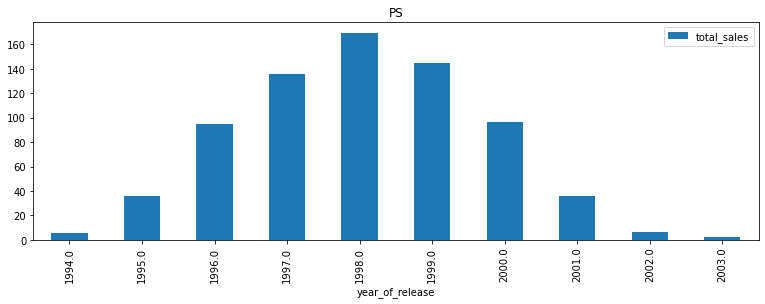

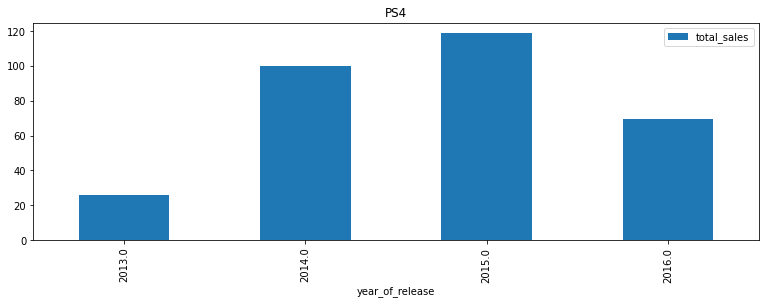

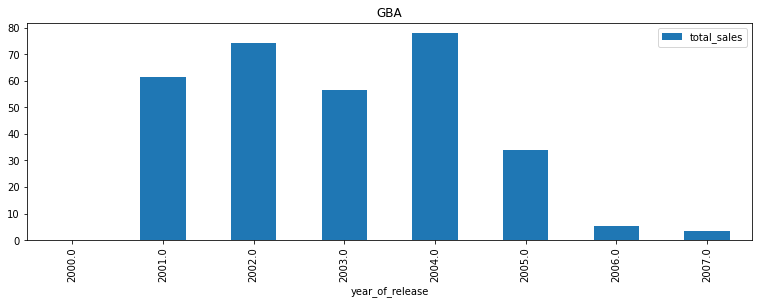

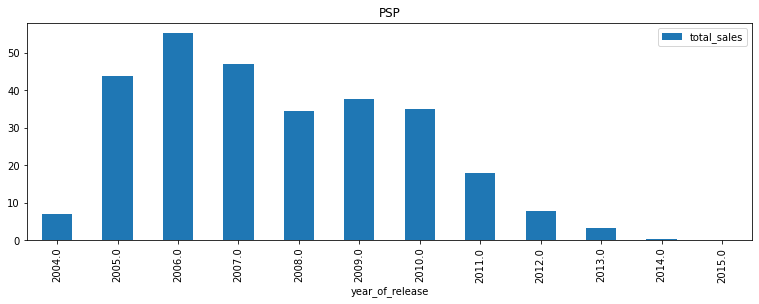

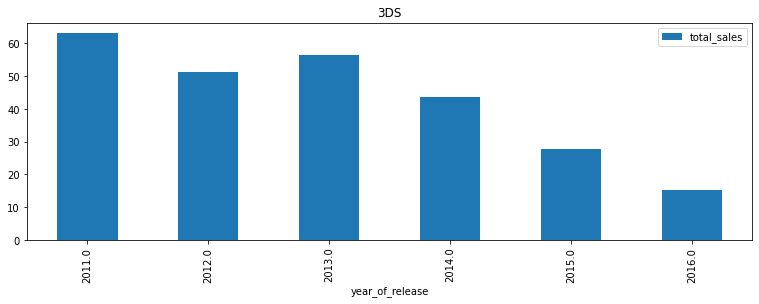

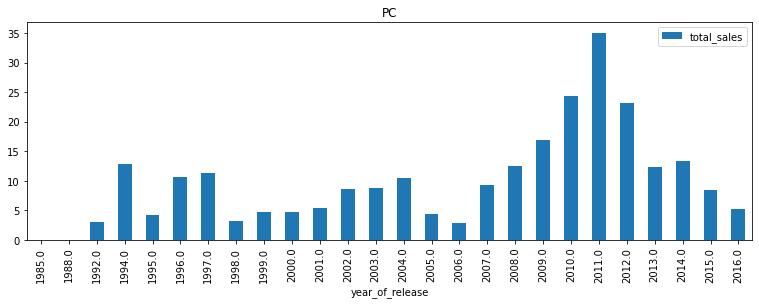

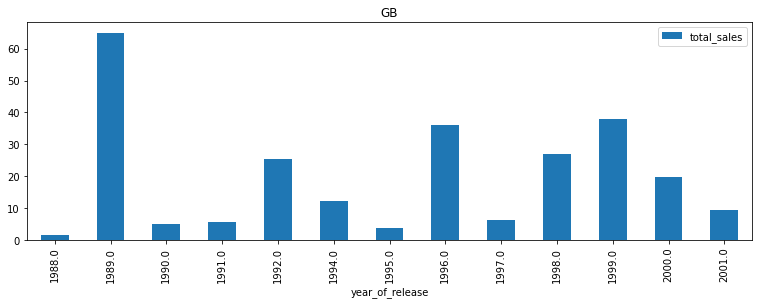

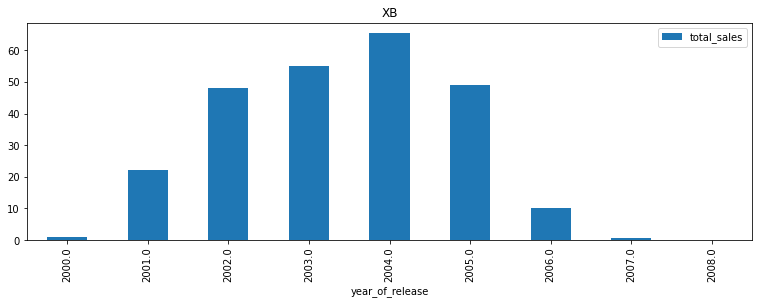

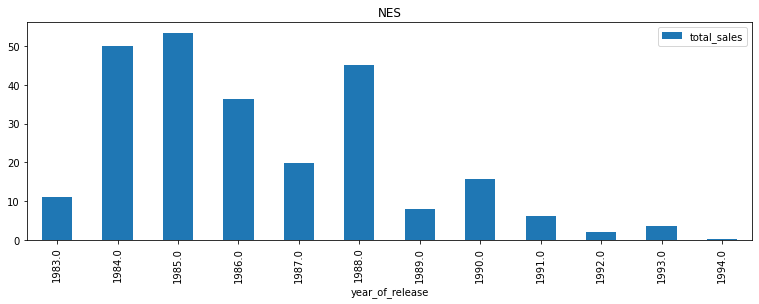

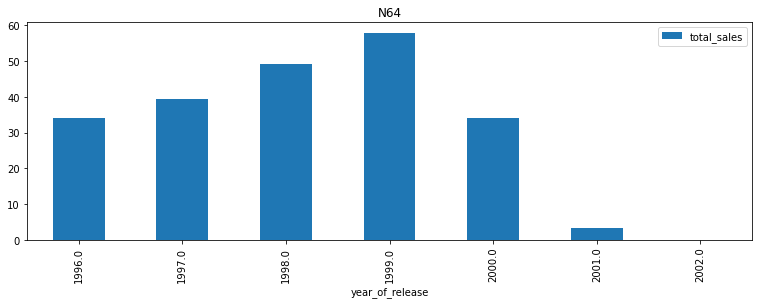

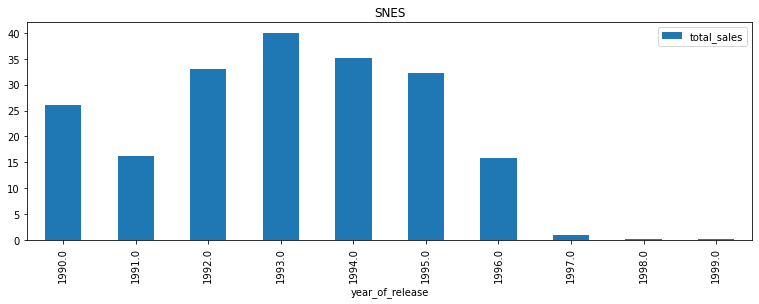

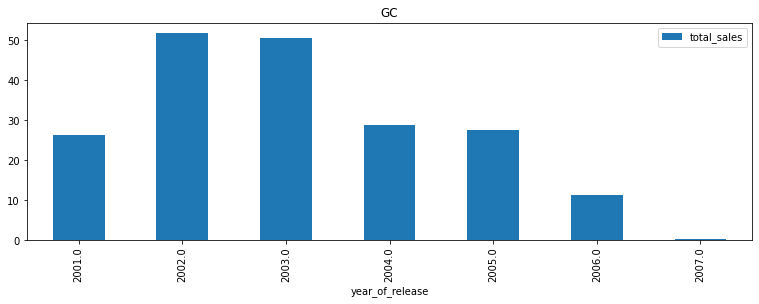

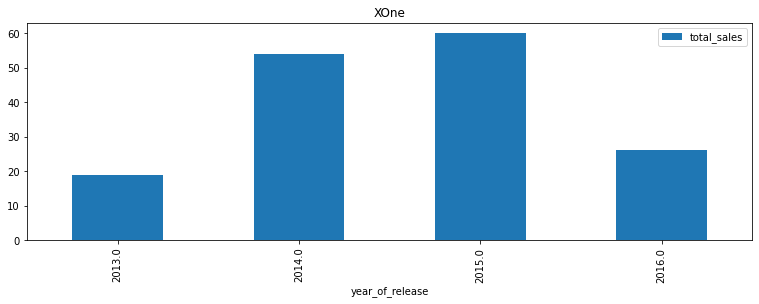

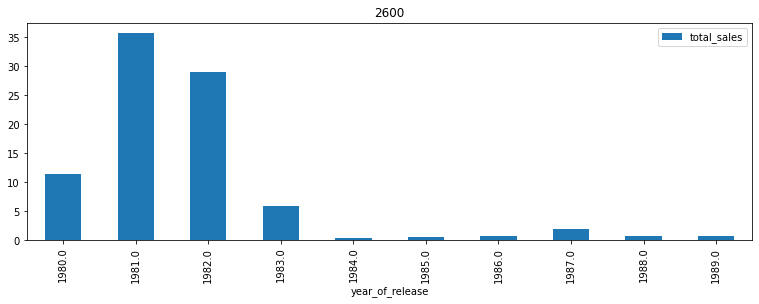

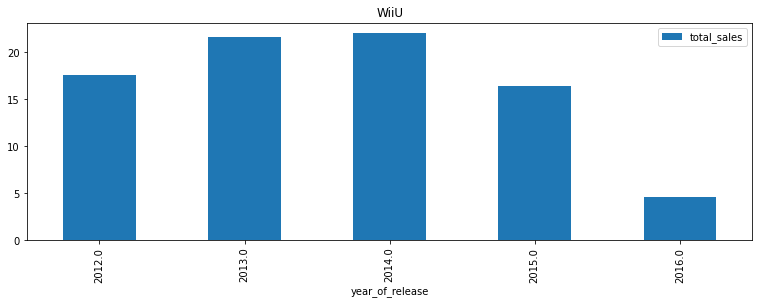

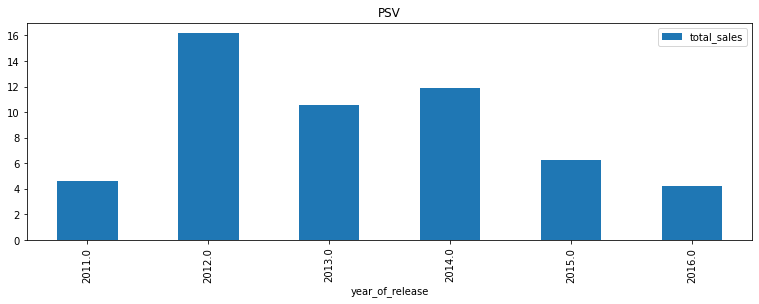

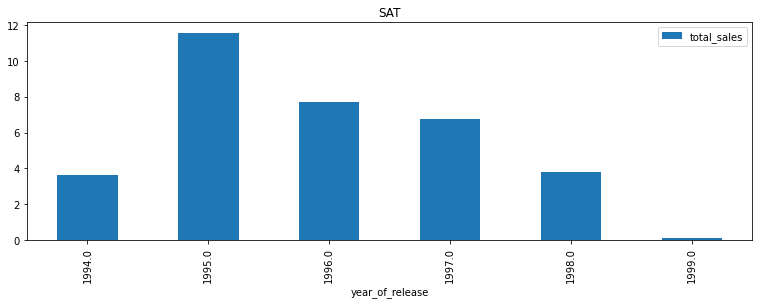

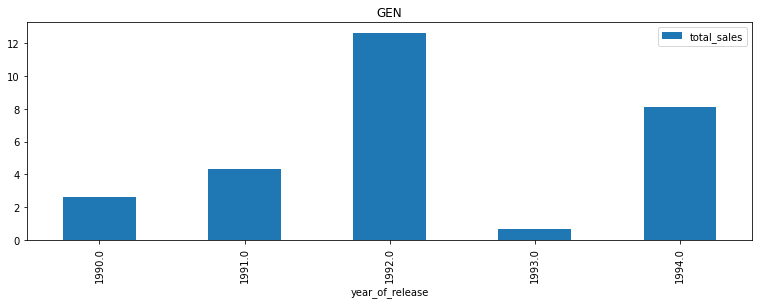

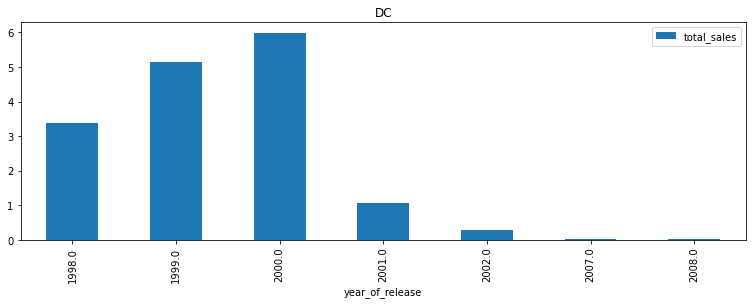

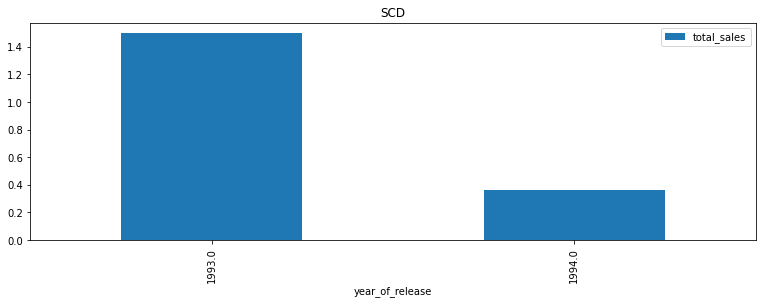

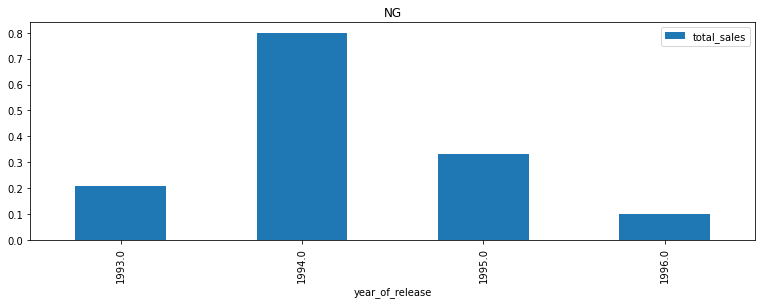

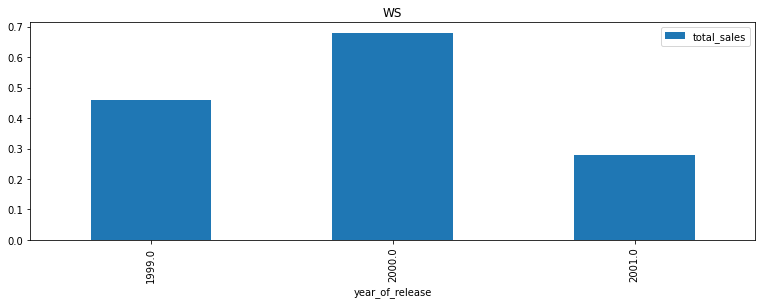

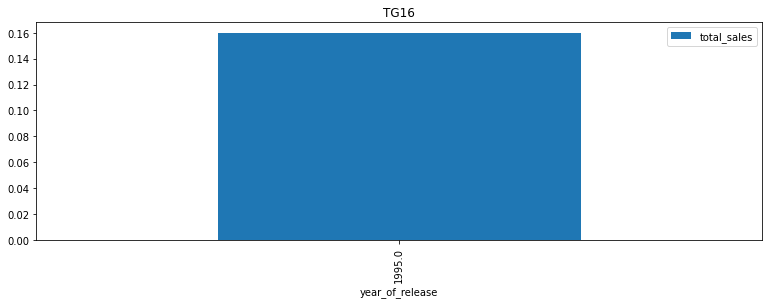

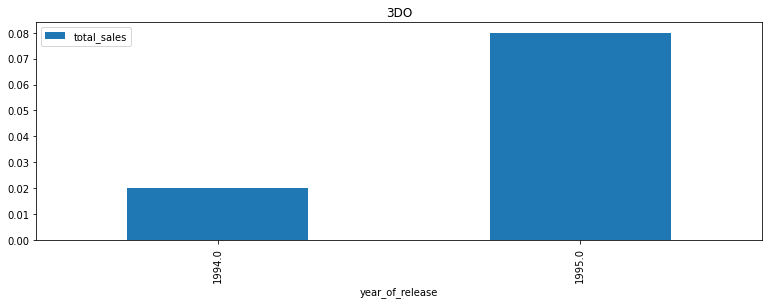

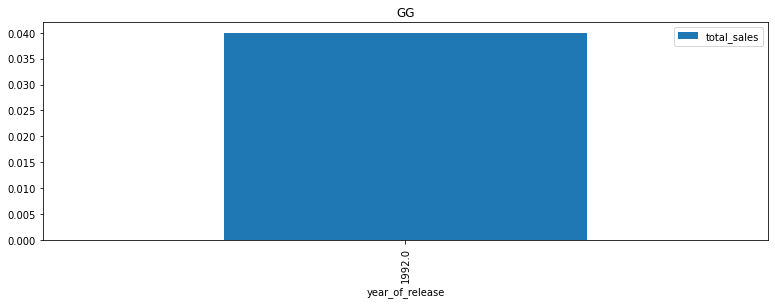

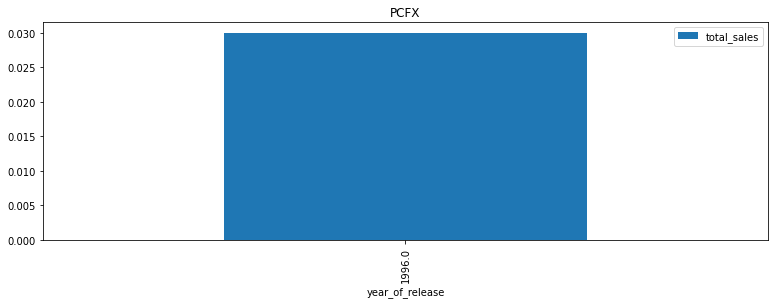

In [16]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms:
    data_games[data_games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

In [17]:
# Создадим свою таблицу по топ-6 платформам и их обшим продажам.
top_6_platforms = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(6)
top_6_platforms = top_6_platforms.reset_index().rename_axis(None, axis=1)
top_6_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Выводы по разделу:
- Исходя из диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет.
- Топ 6 лидеров платформ теряют свою актуальность к 2016 году.
- Большинство платформ фактически перестают существовать к 2016 году.
- Из еще живущих платформ остаются: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.  

Определим актуальный период для дальнейшего исследования:
    Пик развития мндустрии консольных игр приходится на 2008-2009 годы. Далее следует явный спад.
Большинство платформ перестают существовать к 2016 году, поэтому данные по их продажам вряд ли могут быть нам полезны для прогноза на 2017.
Для дальнейшего анализа нужно взять данные по последним годам после пика и существующим еще в этот период платформам.

In [18]:
actual_period_data = data_games[data_games['year_of_release'] > 2015]
actual_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

In [19]:
top_6_list = ['PS4','XOne','PC','WiiU','3DS', 'PSV']
games_top_6_platforms = actual_period_data[actual_period_data['platform'].isin(['PS4','XOne','PC','WiiU','3DS','PSV'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]
games_top_6_platforms['total_sales'].describe()

count    431.000000
mean       0.154223
std        0.241596
min        0.010000
25%        0.020000
50%        0.050000
75%        0.165000
max        1.340000
Name: total_sales, dtype: float64

In [20]:
games_top_6_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1439,Gears of War 4,XOne,2016.0,Shooter,0.78,0.44,0.00,0.12,84.0,6.2,M,1.34
1466,Yokai Watch 3,3DS,2016.0,Action,0.00,0.00,1.33,0.00,NaN,NaN,unknown,1.33
1475,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,unknown,1.32
1615,Madden NFL 17,XOne,2016.0,Sports,1.08,0.02,0.00,0.13,83.0,5.9,E,1.23
1801,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016.0,Fighting,0.41,0.45,0.11,0.17,79.0,8.2,T,1.14
1806,Watch Dogs 2,PS4,2016.0,Action,0.37,0.58,0.00,0.18,83.0,7.8,M,1.13
1904,Forza Horizon 3,XOne,2016.0,Racing,0.42,0.58,0.00,0.08,91.0,7.4,E,1.08
1948,Overwatch,XOne,2016.0,Shooter,0.63,0.33,0.00,0.10,91.0,5.6,T,1.06
2012,The Legend of Zelda: Twilight Princess HD,WiiU,2016.0,Action,0.56,0.30,0.08,0.09,86.0,8.4,T,1.03
2024,NBA 2K17,XOne,2016.0,Sports,0.86,0.06,0.00,0.11,90.0,6.2,E,1.03


In [21]:
#Изучим средние продажи по платформам
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,45.0,0.177778,0.261263,0.01,0.0300,0.080,0.2100,1.33
PC,54.0,0.097222,0.135916,0.01,0.0200,0.035,0.1200,0.65
PS4,150.0,0.184733,0.253927,0.01,0.0225,0.070,0.2675,1.32
PSV,85.0,0.050000,0.056273,0.01,0.0200,0.030,0.0600,0.30
WiiU,14.0,0.328571,0.348135,0.01,0.0475,0.215,0.4075,1.03
XOne,83.0,0.200723,0.308394,0.01,0.0200,0.060,0.2300,1.34


Text(0, 0.5, 'Общие продажи')

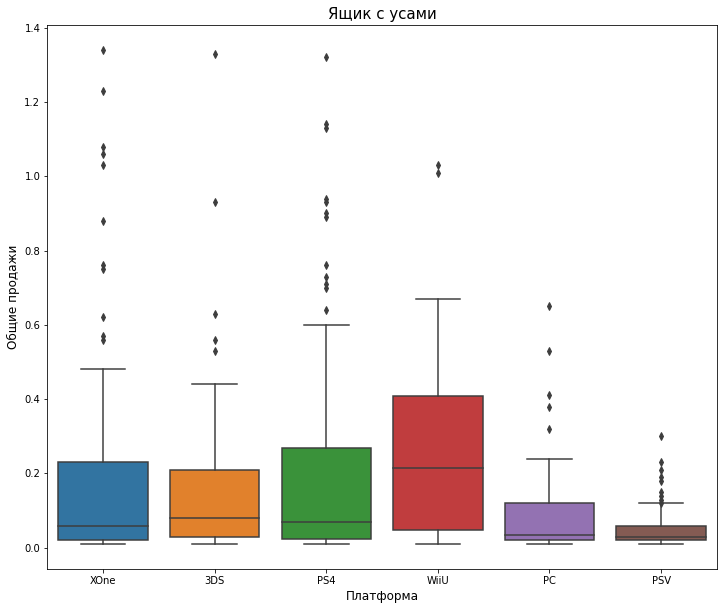

In [22]:
#Нарисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общие продажи',fontsize=12)

In [23]:
# а теперь избавимся от выбросов и построим еще один ящик с усами, чтобы посмотреть распределение внутри.Заменим выбросы на нули.
for x in ['total_sales']:
    q75,q25 = np.percentile(games_top_6_platforms.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    games_top_6_platforms.loc[games_top_6_platforms[x] < min,x] = np.nan
    games_top_6_platforms.loc[games_top_6_platforms[x] > max,x] = np.nan
# посмотрим сколько получилось нулевых значений   
games_top_6_platforms['total_sales'].isnull().sum()

46

In [24]:
games_top_6_platforms_clean=games_top_6_platforms.dropna(axis=0)

Text(0, 0.5, 'Общие продажи')

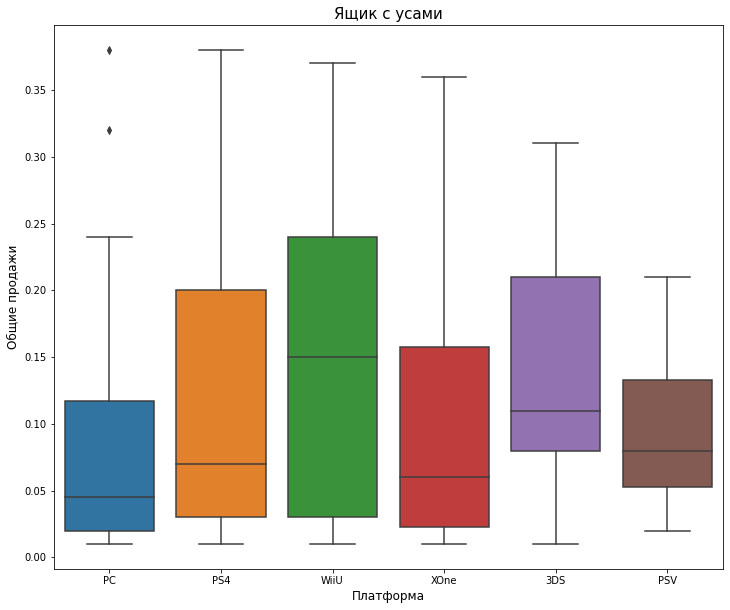

In [25]:
#Нарисуем ящики с усами для данных без выбросов
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms_clean, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Общие продажи',fontsize=12)

## Корреляция между отзывами и продажами.


In [26]:
# Посмотрим как влияют отзывы пользователей и критиков на продажи. Изучим корреляцию между этими двумя показателями.

ps4 = actual_period_data[actual_period_data['platform']=='PS4']
ps4['user_score'].corr(ps4['total_sales'])

-0.122461124196492

Text(0.5, 1.0, 'corr_ps4_users')

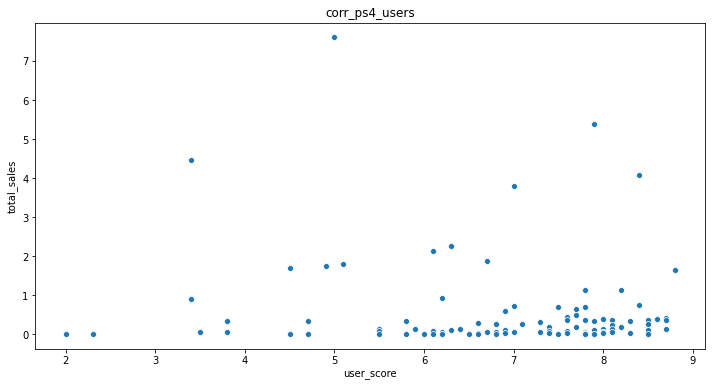

In [27]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.title('corr_ps4_users')

In [28]:
#теперь найдем корреляцию продаж с оценками критиков
ps4['critic_score'].corr(ps4['total_sales'])


0.37569493421469646

Text(0.5, 1.0, 'corr_ps4_users')

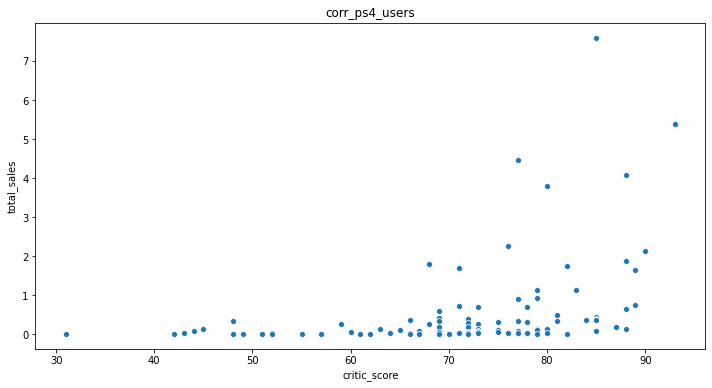

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title('corr_ps4_users')

In [30]:
#Напишем функцию для рассчета корреляции всех платформ с оценками пользователей и критиков.
def platform_correlation(name_of_platform):
    platform = actual_period_data[actual_period_data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=12)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
   
    if 0.3 >= user_correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', user_correl)
    if 0.5 >= user_correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', user_correl)
    if 0.7 >= user_correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', user_correl)
    if 0.9 >= user_correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', user_correl)
    if 1 >= user_correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', user_correl)
    print('\n')
    
    if 0.1 >= user_correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', user_correl)
    if -0.1 >= user_correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', user_correl)
    if -0.3 >= user_correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', user_correl)
    if -0.5 >= user_correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', user_correl)
    if -0.7 >= user_correl >= -0.9:
         print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', user_correl)
    if -0.9 >= user_correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', user_correl)
    print('\n')

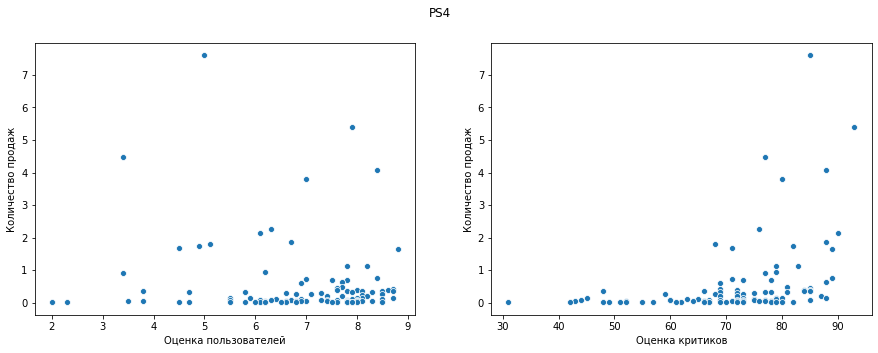

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.37569493421469646


Корреляция между отзывами пользователей и продажами  PS4 : Слабая обратная -0.122461124196492




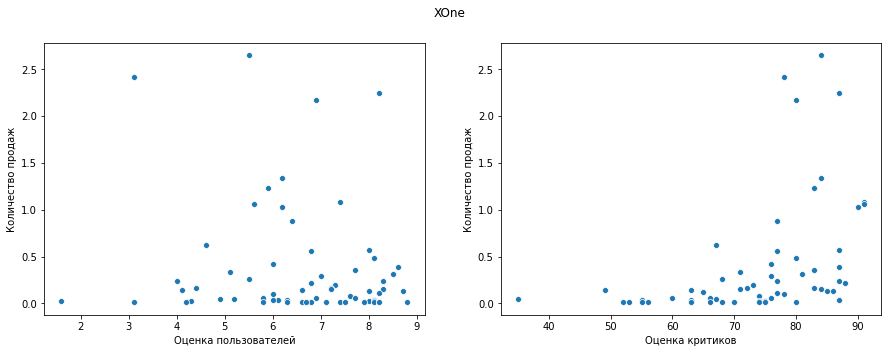

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.41200525431688656


Корреляция между отзывами пользователей и продажами  XONE : Слабая обратная -0.1303029975447243




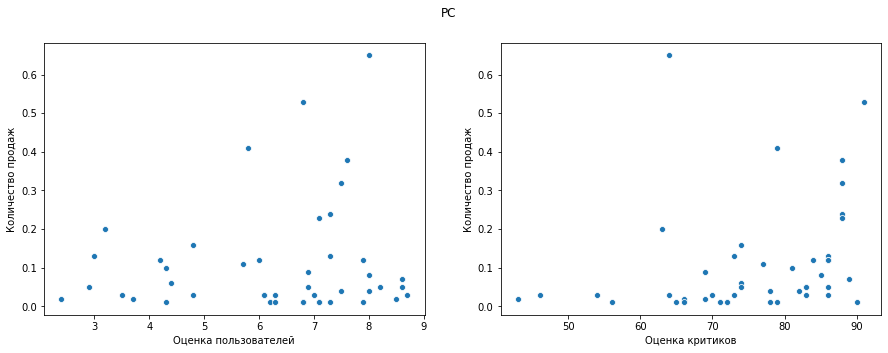

Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.2541518566236835
Корреляция между отзывами пользователей и продажами  PC : Слабая 0.11618254888243372






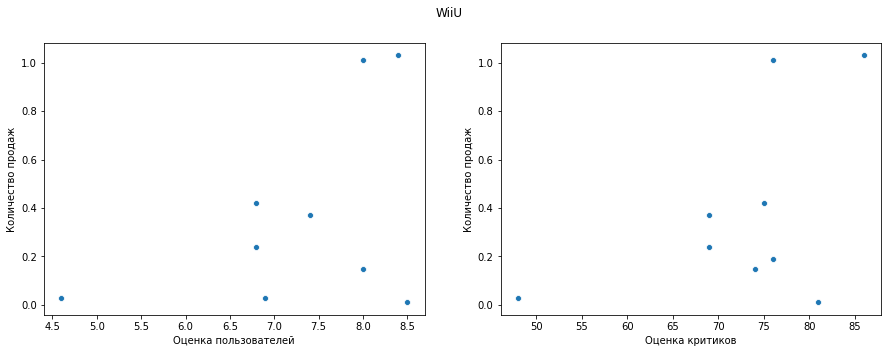

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.4864902774456388
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.437629906494407






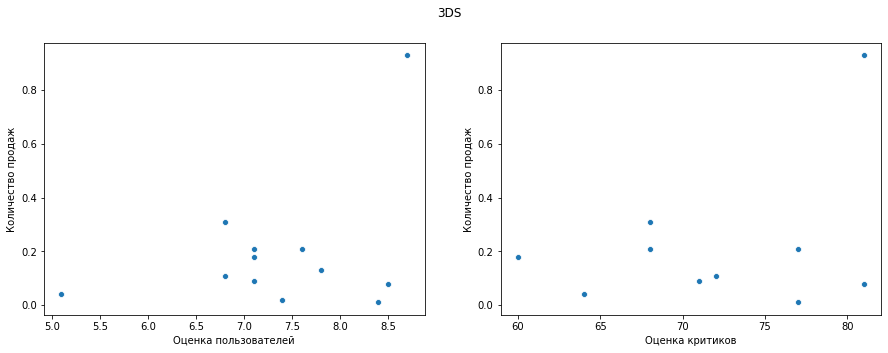

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.33840848355747477
Корреляция между отзывами пользователей и продажами  3DS : Умеренная 0.3733649712783034






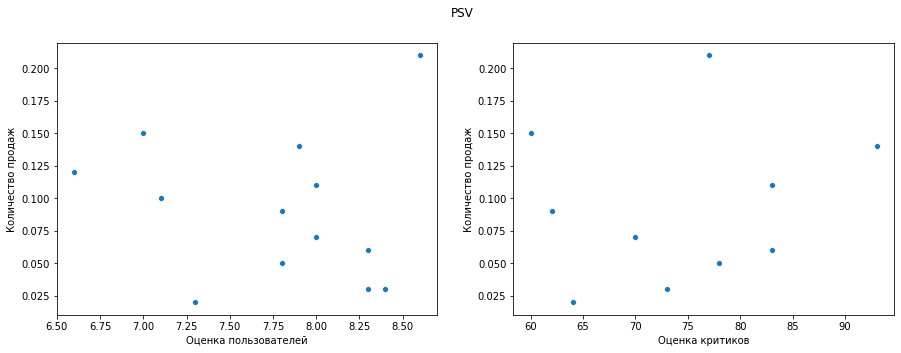

Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.18480719274930904


Корреляция между отзывами пользователей и продажами  PSV : Корреляция не выявлена -0.08874901734787631




In [31]:
for platform in top_6_list:
    platform_correlation(platform)

Выводы:
У платформ PS4, Xbox One, WiiU, 3DS связь между оценками критиков и продажами есть, но не сильная. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Это говорит о том, что покупатели больше ориентируются на оценки критиков,а не пользователеф при совершении покупки, кроме платформы WiiU, где влияние оценок пользователей заметно выше.

Проанализируем продажи по жанрам:

In [32]:
genre_sales_mean = games_top_6_platforms_clean.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre_sales_mean

,genre,total_sales
0,Fighting,0.157143
1,Misc,0.150000
2,Role-Playing,0.148333
3,Shooter,0.143500
4,Sports,0.133125
5,Platform,0.120000
6,Strategy,0.110000
7,Action,0.101429
8,Racing,0.068571
9,Adventure,0.045000


Text(0, 0.5, 'Среднее продаж')

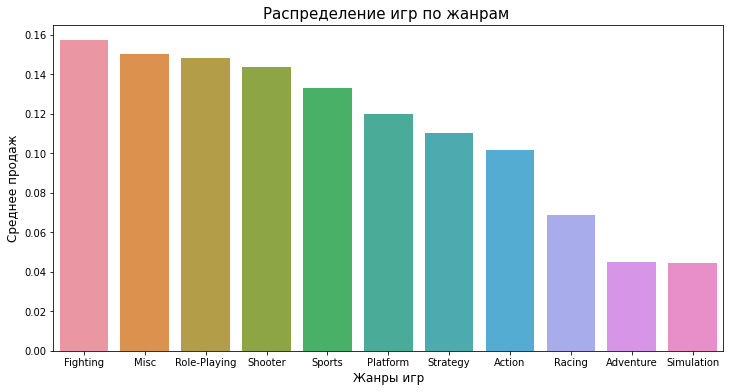

In [33]:
#Визуализируем таблицу на графике
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_sales_mean, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Среднее продаж',fontsize=12)

In [34]:
genre_sales_median = games_top_6_platforms_clean.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre_sales_median

,genre,total_sales
0,Role-Playing,0.145
1,Misc,0.110
2,Platform,0.095
3,Shooter,0.095
4,Fighting,0.090
5,Strategy,0.090
6,Action,0.065
7,Racing,0.050
8,Sports,0.050
9,Adventure,0.030


Text(0, 0.5, 'Медианы продаж')

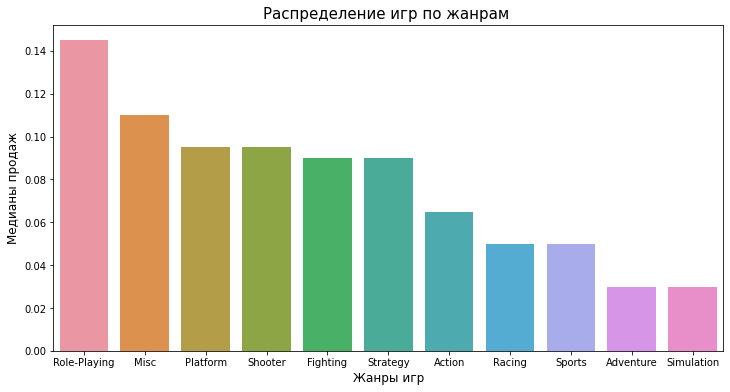

In [35]:
#Визуализируем таблицу на графике
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_sales_median, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Медианы продаж',fontsize=12)

Жанр Shooter безусловный лидер продаж, второе и третье место делят между собой жанры Sports и Platform. Хуже всех результаты показывает жанр Adventure.

Вывод по исследовательскому анализу данных:
Активнеый рост игр наблюдается с конца 90х до 2008 года, но с этого момента наблюдается общий спад по всем платформам. Вероятнее всего это связано с развитием мобильных игр.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS.
Средняя жизнь платформы составляет 8-10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего было продано игр на Sony Playstation и Xbox 360.
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.

## Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-6), жанры (топ-6), влияние рейтинга ESRB на продажи.

In [36]:
#Функция для создания сводбных таблиц за весь период
def user_portrait(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes):
        ppivot = data_games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(6)
        display(ppivot)
 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def user_portrait_2016(row, title):
    temp = data_games[data_games['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(6)
        display(ppivot)

        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

Портрет пользователя North America 

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31
5,PS,334.72


,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57
5,Racing,356.86


,rating,na_sales
0,E,1274.24
1,unknown,1225.84
2,T,747.60
3,M,742.89
4,E10+,345.50
5,K-A,2.56


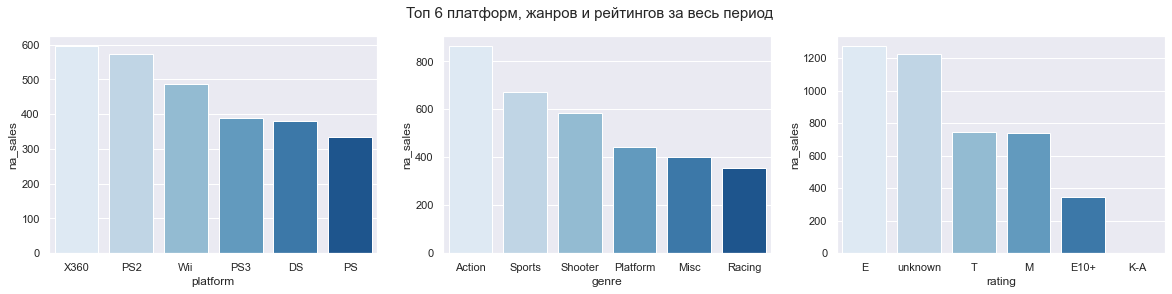

In [37]:
#Выведем топ 6 платформ, жанров и рейтингов за весь период
user_portrait('na_sales','Топ 6 платформ, жанров и рейтингов за весь период')

,platform,na_sales
0,PS4,21.49
1,XOne,14.27
2,3DS,4.14
3,WiiU,2.10
4,PC,1.36
5,X360,0.69


,genre,na_sales
0,Shooter,16.24
1,Action,9.29
2,Sports,7.54
3,Role-Playing,5.89
4,Fighting,1.84
5,Platform,1.29


,rating,na_sales
0,M,15.67
1,T,8.95
2,unknown,8.53
3,E,7.97
4,E10+,3.81


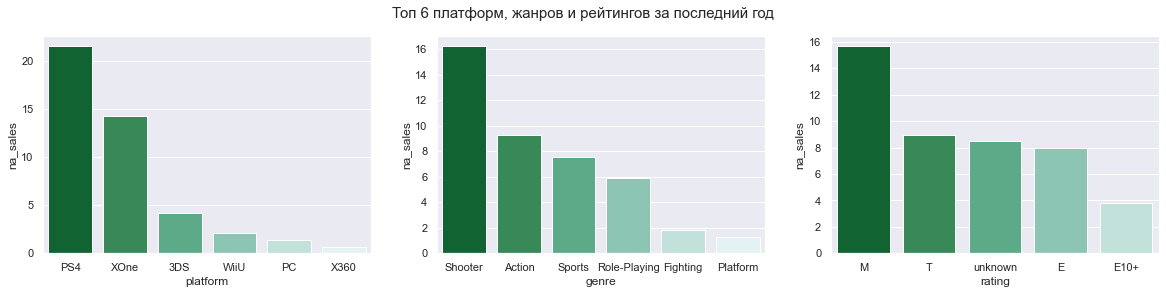

In [38]:
#Выведем топ 6 платформ, жанров и рейтингов за последний год
user_portrait_2016('na_sales','Топ 6 платформ, жанров и рейтингов за последний год')

Вывод:

Самые популярные платформы в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS, PS
Топ 5 жанров в Северной Америке за все время: action, sports, shooter, platform, misc, racing
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если же взять данные за последний год, то общая картина заметно меняется:

Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, PC,X360
Топ жанров игр: Shooter, Action, Sports, Role-Playing, Fighting, Platform.
Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех".

Портрет пользователя European Union

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39
5,DS,188.41


,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60
5,Platform,199.39


,rating,eu_sales
0,E,703.87
1,unknown,609.65
2,M,480.00
3,T,421.79
4,E10+,183.35
5,AO,0.61


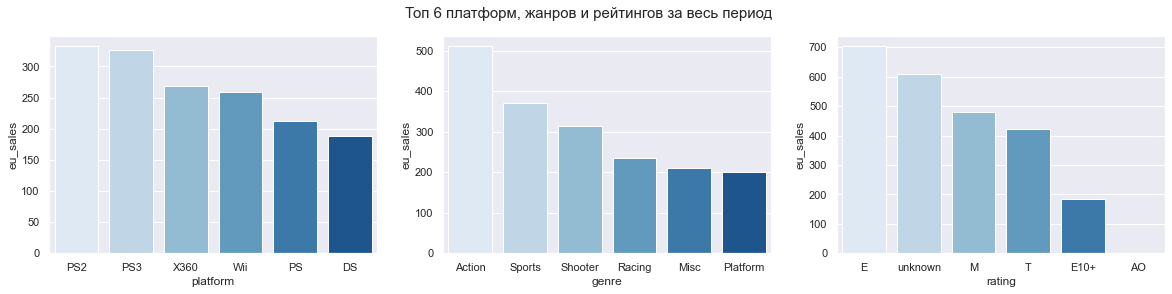

In [39]:
#Выведем топ 6 платформ, жанров и рейтингов за весь период
user_portrait('eu_sales','Топ 6 платформ, жанров и рейтингов за весь период')

,platform,eu_sales
0,PS4,31.78
1,XOne,9.63
2,PC,3.53
3,3DS,2.33
4,WiiU,1.48
5,PS3,1.26


,genre,eu_sales
0,Shooter,15.90
1,Sports,12.01
2,Action,10.68
3,Role-Playing,4.28
4,Racing,1.77
5,Platform,1.39


,rating,eu_sales
0,M,16.54
1,E,13.61
2,T,9.79
3,unknown,7.47
4,E10+,3.81


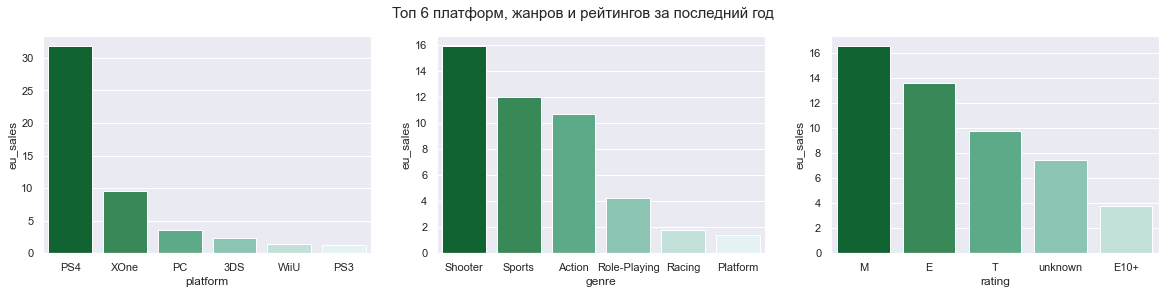

In [40]:
#Выведем топ 6 платформ, жанров и рейтингов за последний год
user_portrait_2016('eu_sales','Топ 6 платформ, жанров и рейтингов за последний год')

Вывод:

Самые популярные игровые платформы в Европе за все время это: PS2, PS3, X360, WII, PS, DS
Топ 5 жанров в Европе за все время: action, sports, shooter, racing, misc, platform
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Если же взять данные за последний год, то общая картина заметно меняется:

Топ игровых приставок выглядит таким образом : PS4, Xone, PC, 3DS, WiiU, PS3
Топ жанров игр: Shooter, Sports, Action, Role-Playing, Racing, Platform
Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

Портрет пользователя Japanese

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62
5,NES,98.65


,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02
5,Fighting,87.28


,rating,jp_sales
0,unknown,836.74
1,E,197.96
2,T,150.70
3,M,63.58
4,E10+,40.20
5,K-A,1.46


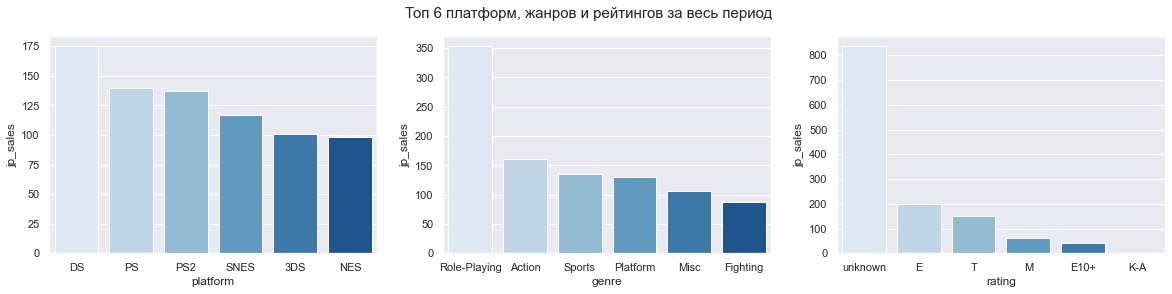

In [41]:
#Выведем топ 6 платформ, жанров и рейтингов за весь период
user_portrait('jp_sales','Топ 6 платформ, жанров и рейтингов за весь период')

,platform,jp_sales
0,3DS,8.03
1,PS4,5.74
2,PSV,3.56
3,PS3,1.30
4,WiiU,0.67
5,XOne,0.01


,genre,jp_sales
0,Action,7.07
1,Role-Playing,6.61
2,Adventure,1.18
3,Shooter,1.06
4,Misc,1.04
5,Sports,0.92


,rating,jp_sales
0,unknown,14.32
1,T,2.27
2,M,1.20
3,E,1.07
4,E10+,0.45


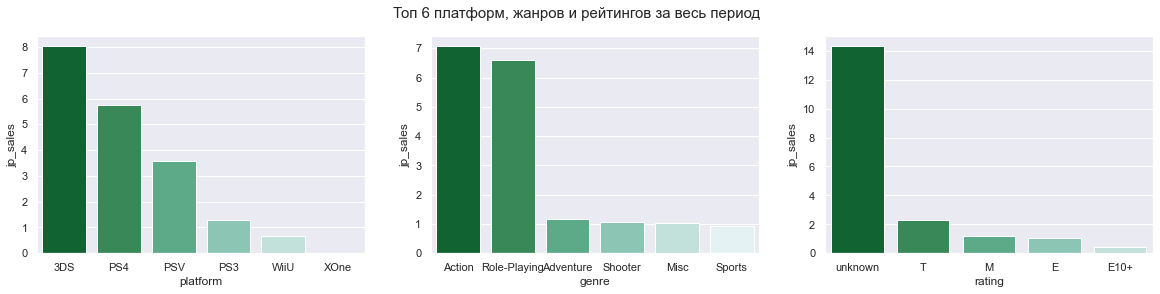

In [42]:
#Выведем топ 6 платформ, жанров и рейтингов за последний год
user_portrait_2016('jp_sales','Топ 6 платформ, жанров и рейтингов за весь период')

Вывод:

Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS, NES
Топ 6 жанров в Японии за все время: ole-playing, action, sports, platform, misc, fighting
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если же взять данные за последний год, то общая картина заметно меняется:

Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3, WiiU, XOne
Топ жанров игр: Action, Role-Playing, Adventure, Shooter, Misc,Sports
Топ рейтингов: "От 13 и выше", "От 17 и выше" и "Для всех".

Визуализируем суммарные продажи игр по жанрам, рейтингу и платформам.

<AxesSubplot:xlabel='genre-rating', ylabel='platform'>

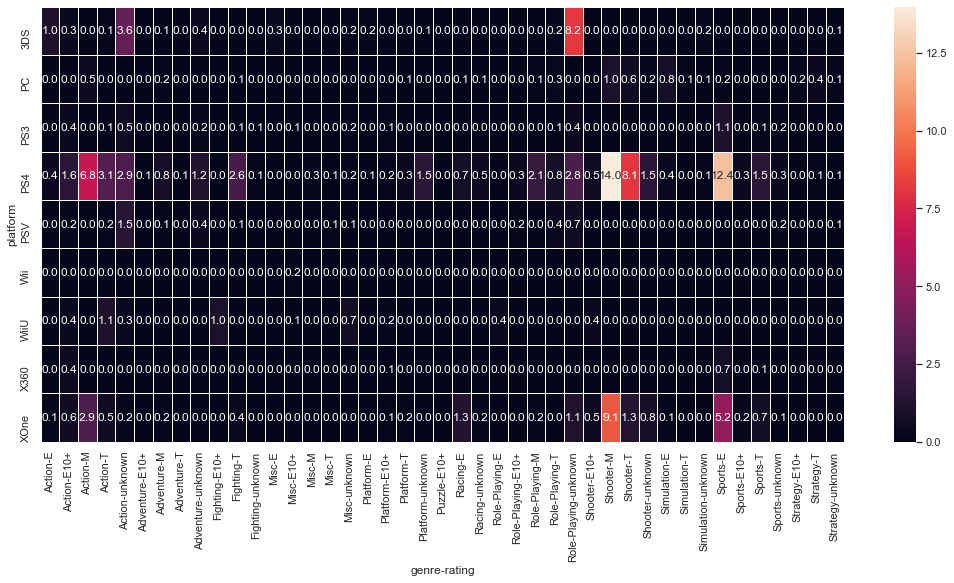

In [43]:
platform_genre_sales = data_games[data_games['year_of_release']>2015].pivot_table(
    index='platform', columns=['genre', 'rating'], values='total_sales', aggfunc='sum').fillna(0).applymap(float)
plt.figure(figsize=(18,8))
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

В нашем датасете много игр без рейтинга. Посмотрим на их продажи по регионам за 2016 год.

Продажи игр без рейтинга в Северной Америке.

In [44]:
# Продажи игр без рейтинга по платформам для Северной Америки.
no_rate_na = data_games[pd.isnull(data_games['rating'])]
#no_rate_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
#        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

In [45]:
# Продажи игр без рейтинга по жанрам для Северной Америки.
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

KeyError: 'na_sales'

In [ ]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Северной Америке.
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='platform', values='na_sales', aggfunc='count').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

Выводы по продажам игр без рейтинга в Северной Америке:
- Во-первых, самих игр с ненулевыми продажами не так много. 
- Лидирующая по продажам платформа - 3DS. Следом идут PS4 и Xbox One.
- Лидирующий по продажам жанр - Role-Playing. С заметным отставанием идут Action и Shooter.

Продажи игр без рейтинга в Европе.

In [ ]:
# Продажи игр без рейтинга по платформам для Европе.
no_rate_eu = data_games[pd.isnull(data_games['rating'])]
no_rate_eu = no_rate_eu[no_rate_eu['year_of_release']>2015]
no_rate_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

In [ ]:
# Продажи игр без рейтинга по жанрам для Европы.
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

In [ ]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Европе.
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='platform', values='eu_sales', aggfunc='count').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

Выводы по продажам игр без рейтинга в Европе:
- Игр с ненулевыми продажами также не так много. 
- Лидирующая по продажам платформа - PS4. Следом идут 3DS и Xbox One.
- Лидирующий по продажам жанр - Role-Playing. С заметным отставанием идут Action и Shooter.

Продажи игр без рейтинга в Японии.¶

In [ ]:
# Продажи игр без рейтинга по платформам для Японии.
no_rate_jp = data_games[pd.isnull(data_games['rating'])]
no_rate_jp = no_rate_jp[no_rate_jp['year_of_release']>2015]
no_rate_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

In [ ]:
# Продажи игр без рейтинга по жанрам для Японии.
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

In [ ]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Японии.
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='platform', values='jp_sales', aggfunc='count').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

Выводы по продажам игр без рейтинга в Японии:
- В Японии ситуация иная. Игр с ненулевыми продажами и без рейтинга там значительно больше, чем в Америке и Европе. 
- Лидирующая по продажам платформа с большим перевесом - 3DS. На втором и третьем местах идут PSV и PS4.
- Лидирующий по продажам жанр - Action. Немного уступает - Role-Playing. И замыкает тройку - Adventure.

Вывод по составлению портрета пользователя каждого региона
Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год:\ То в Северной Америке:\ топ игровых платформ выглядит так: PS4, Xone, DS3;\ Топ Жанров игр: Shooter, Action, Sports;\ Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".

В Европейском Союзе:\ Топ игровых платформ : PS4, Xone, PC;\ Топ жанров: Shooter, Sports, Action;\ Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".

В Японии:\ Топ игровых платформ : 3DS, PS4, PSV;\ Топ жанров: Action, Role-playing, Adventure;\ Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".

Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.

## Проведем исследование статистических показателей.
Посмотрим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.

In [ ]:
# Выведем две сводные талицы по жанрам и рейтингам за 2016 год.
critic_genre = data_games[data_games['year_of_release'] > 2015].pivot_table(
    index='genre', values='critic_score', aggfunc='mean').fillna(0).sort_values(by='critic_score', ascending=False)
user_genre = data_games[data_games['year_of_release'] > 2015].pivot_table(
    index='genre', values='user_score', aggfunc='mean').fillna(0).sort_values(by='user_score', ascending=False)
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(critic_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[0])
sns.heatmap(user_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[1])

Вывод:

На основе средних оценок по жанрам за 2016 год можно заключить:

Наивысшие оценки критиков получают: strategy, role-playing, shooter.
Наивысшие оценки пользователей получают: role-playing, adventure, misc.
Это говорит о том, что мнения критиков по поводу игр не всегда совпадают с мнением пользователей.

Посчитаем среднее количество, дисперсию и стандартное отклонение

In [ ]:
#Составим массив с игровыми жанрами. 
game_genres = actual_period_data['genre'].unique()
game_genres = game_genres[:-1]
game_genres

In [ ]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(actual_period_data[actual_period_data['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(actual_period_data[actual_period_data['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  actual_period_data[actual_period_data['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  actual_period_data[actual_period_data['genre']==genre]['user_score'].median())
    print('\n')

In [ ]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(actual_period_data[actual_period_data['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(actual_period_data[actual_period_data['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  actual_period_data[actual_period_data['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  actual_period_data[actual_period_data['genre']==genre]['critic_score'].median())
    print('\n')

Построим распределения оценок пользователей и критиков по жанрам игр.

In [ ]:
# Напишем функцию для отрисовки гистограм.
def genre_hist(genre):
    fig, axes = plt.subplots()
    data = actual_period_data[actual_period_data['genre'] == genre]
    user_score = data['user_score'] * 10
    critic_score = data['critic_score']
    colors = ['black', 'r']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

In [ ]:
for genre in game_genres:
    genre_hist(genre)

Построим общие распределения оценок пользователей и критиков

In [ ]:
# Для этого нам потребуется домножить оценки пользователей на *10, чтобы мы смогли сравнить распределения.
user_score =actual_period_data['user_score'] * 10
critic_score = actual_period_data['critic_score']
colors = ['black', 'r']

plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
plt.legend()

Распределения оценок пользователей и критиков симметричны и оба смещены влево. Это означает, что в нашем датасете куда меньше игр с оценками критиков > 80 и оценками пользователей > 8.

## Проверим гипотезы.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action и Sports разные. Пороговое значение alpha зададим самостоятельно. Поясним:
Как мы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последний год)
xone_hyp = actual_period_data[(actual_period_data['platform']=='XOne')]['user_score']
pc_hyp = actual_period_data[(actual_period_data['platform']=='PC')]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
print('средний рейтинг пользователя для xbox платформ' , xone_hyp.mean())
#Посчитаем средний рейтинг пользователя для PC платформ
print('средний рейтинг пользователя для pc платформ' , pc_hyp.mean())

In [ ]:
# Произведем проверку дисперсии выборок
print(np.var(actual_period_data[actual_period_data['platform']=='XOne']['user_score']))

print(np.var(actual_period_data[actual_period_data['platform']=='PC']['user_score']))

In [ ]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вывод: Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 3.7%, чтобы можно было получить различность рейтингов двух платформ.

Средние пользовательские рейтинги жанров Action  и Sports разные
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [ ]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = actual_period_data[(actual_period_data['genre']=='Action')]['user_score']
genre_sports_hyp = actual_period_data[(actual_period_data['genre']=='Sports')]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

In [ ]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

In [ ]:
# Произведем проверку дисперсии выборок
np.var(actual_period_data[actual_period_data['genre']=='Action']['user_score'])

In [ ]:
np.var(actual_period_data[actual_period_data['genre']=='Sports']['user_score'])

In [ ]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Вывод: Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейтинги по двум жанрам.

Вывод по проверке гипотез
Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

Общий вывод
Перед анализом данных мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок. Привели к правильным типам данных необходимые столбцы. Определили, что аббревиатура TBD значит to be determined, to be done. То есть, данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр. За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самый популярный жанр за последний год: 'Shooter'. Якорем висит жанр 'Strategy'.
После мы составили портреты пользователей каждого региона за все года.

Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год (2016):\ То в Северной Америке:

Топ игровых платформ выглядит так: PS4, Xone, DS3;
Топ Жанров игр: Shooter, Action, Sports;
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".
В Европейском Союзе:

Топ игровых платформ : PS4, Xone, PC;
Топ жанров: Shooter, Sports, Action;
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".

В Японии:

Топ игровых платформ : 3DS, PS4, PSV;
Топ жанров: Action, Role-playing, Adventure;
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".
Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.

